<a href="https://colab.research.google.com/github/jocelynbaduria/cmpe-257_Machine_Learning/blob/main/%5BJocelyn_Baduria%5D_HW3_Fractal_Clustering_With_Name_257_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Wrangling

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.1 Import Libraries and Read the Data from CSV

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import matplotlib as mpl

In [13]:
path = '/content/drive/My Drive/Underdog/data/Asteroid_Updated.csv'

data = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
data.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


# 1.2 Data Cleaning and Preparation

## Check Missing and Drop Rows With No Data For Diameter and Rotation Period Data Feature . There are 83% Missing Diameter Data and 97% Missing Rotation Period Data

In [15]:
data.isnull().sum()/data.shape[0] * 100

name              97.383990
a                  0.000238
e                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
q                  0.000000
ad                 0.000715
per_y              0.000119
data_arc           1.842770
condition_code     0.103249
n_obs_used         0.000000
H                  0.320228
neo                0.000715
pha                1.958048
diameter          83.609181
extent            99.997856
albedo            83.755302
rot_per           97.761619
GM                99.998333
BV                99.878411
UB                99.883413
IR                99.999881
spec_B            99.801599
spec_T            99.883294
G                 99.985829
moid               1.958048
class              0.000000
n                  0.000238
per                0.000715
ma                 0.000953
dtype: float64

In [16]:
data.shape

(839714, 31)

In [17]:
data.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

## Drop Missing Rows Data for Diameter, Rotation Period, Albedo

In [18]:
data = data.dropna(subset=['diameter','rot_per','albedo'])
data.shape

(11154, 31)

In [19]:
data.isnull().sum()

name               5744
a                     0
e                     0
i                     0
om                    0
w                     0
q                     0
ad                    0
per_y                 0
data_arc              0
condition_code        0
n_obs_used            0
H                     0
neo                   0
pha                   0
diameter              0
extent            11142
albedo                0
rot_per               0
GM                11142
BV                10176
UB                10216
IR                11153
spec_B            10044
spec_T            10217
G                 11037
moid                  0
class                 0
n                     0
per                   0
ma                    0
dtype: int64

In [20]:
data = data.dropna(subset=['name'])
data.shape

(5410, 31)

## Drop Columns with missing data 

In [21]:
data.drop(['extent','IR','spec_B','spec_T','GM','BV','UB','G'], axis=1, inplace=True)
data.isnull().sum()

name              0
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
albedo            0
rot_per           0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64

## Check the diameter and rotation period data if all Numeric. Diameter data is Object 

In [22]:
data.dtypes

name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
rot_per           float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [23]:
data.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,albedo,rot_per,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,0.0900,9.074170,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,0.1010,7.813200,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,0.2140,7.210000,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,0.4228,5.342128,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,0.2740,16.806000,1.09589,MBA,0.238632,1508.600458,282.366289


## Convert Some Data to Float

In [24]:
data['diameter'] = data['diameter'].astype(float) 
data['condition_code'] = data['condition_code'].astype(float) 
#this will label as one hot vectors (neo and pha string values to int)
# data['neo'] = data['neo'].map({1: 'Y', 2: 'N'}).astype(float)
data['neo'] = data['neo'].astype('category').cat.codes
data['pha'] = data['pha'].astype('category').cat.codes
data['class'] = data['class'].astype('category').cat.codes
# data['pha'] = data['pha'].map({1: 'Y', 2: 'N'}).astype(float)
data.dtypes

name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code    float64
n_obs_used          int64
H                 float64
neo                  int8
pha                  int8
diameter          float64
albedo            float64
rot_per           float64
moid              float64
class                int8
n                 float64
per               float64
ma                float64
dtype: object

In [25]:
data.isnull().sum()/data.shape[0] * 100

name              0.0
a                 0.0
e                 0.0
i                 0.0
om                0.0
w                 0.0
q                 0.0
ad                0.0
per_y             0.0
data_arc          0.0
condition_code    0.0
n_obs_used        0.0
H                 0.0
neo               0.0
pha               0.0
diameter          0.0
albedo            0.0
rot_per           0.0
moid              0.0
class             0.0
n                 0.0
per               0.0
ma                0.0
dtype: float64

# 1.3 Performing Feature Importance Using Random Forest Gini Index and Permutation Feature Importance


In [ ]:
# !pip install shap

In [26]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
# import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [27]:
# Load the data set and split for training and testing.
column_name=['a','e','i','om','w','q','ad','per_y','data_arc','condition_code','n_obs_used','H','neo','pha','diameter','albedo','rot_per',
                                'moid','class','n','per','ma']
X = pd.DataFrame(data, columns=column_name) 
y = pd.DataFrame(data, columns=column_name)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:
# print(X)

In [ ]:
# print(y)

In [28]:
# Fit the Random Forest Regressor with 100 Decision Trees:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
# To get the feature importances from the Random Forest model use the feature_importances_ argument:
rf.feature_importances_

array([3.95149949e-03, 1.58295662e-04, 1.30761111e-04, 9.53395044e-05,
       1.35285947e-04, 1.34674123e-03, 9.79601903e-03, 3.15654205e-03,
       9.59949611e-01, 2.12102563e-03, 2.01312142e-03, 1.20241878e-03,
       1.47514587e-05, 2.36024513e-06, 2.10986426e-03, 8.54660218e-05,
       1.58510433e-04, 1.94863875e-03, 2.45769090e-03, 5.80039415e-03,
       3.25818909e-03, 1.07473525e-04])

Text(0.5, 0, 'Random Forest Feature Importance')

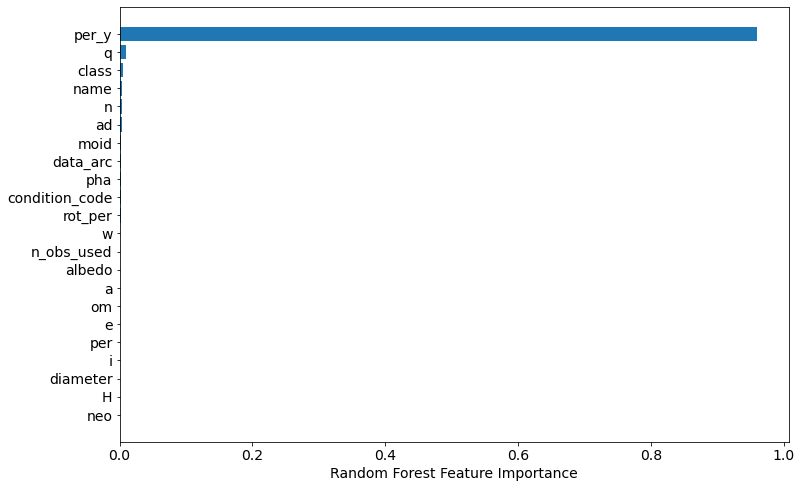

In [31]:
# To have an even better chart, let’s sort the features, and plot again:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(data.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [32]:
# Permutation-based Importance
# The permutation-based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. 
# It is implemented in scikit-learn as permutation_importance method.
perm_importance = permutation_importance(rf, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

Text(0.5, 0, 'Permutation Importance')

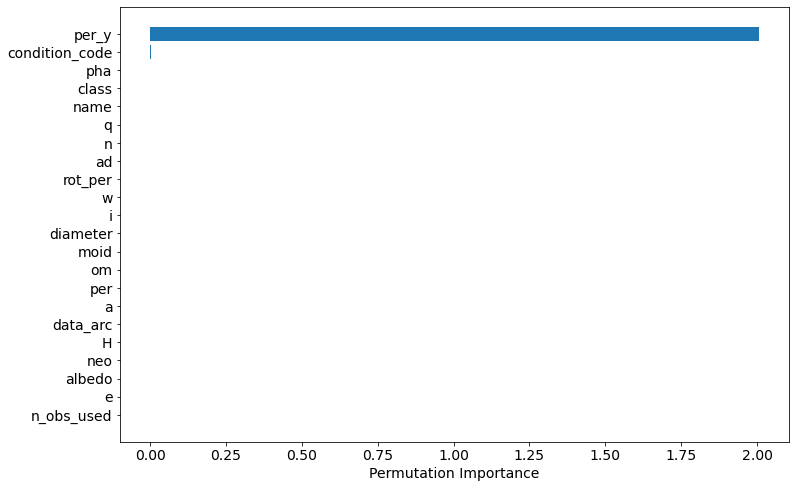

In [33]:
# Plot the importance:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(data.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# 2. Perform Fractal Kmeans Clustering on Diameter and Rotation Period data

In [34]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import StandardScaler

# 2.1 First Clustering Iteration

### Perform Elbow Method (SSE Within Clusters) and Silhouette Score
### silhouette score: 0.74
### sse withing cluster: 4129.0




In [36]:
def plot_cluster(n, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """

    X = data.iloc[:, [15, 17]].values
    # Using Standard Scaler
    sc = StandardScaler()
    S_c = sc.fit_transform(X)
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(S_c)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(S_c, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

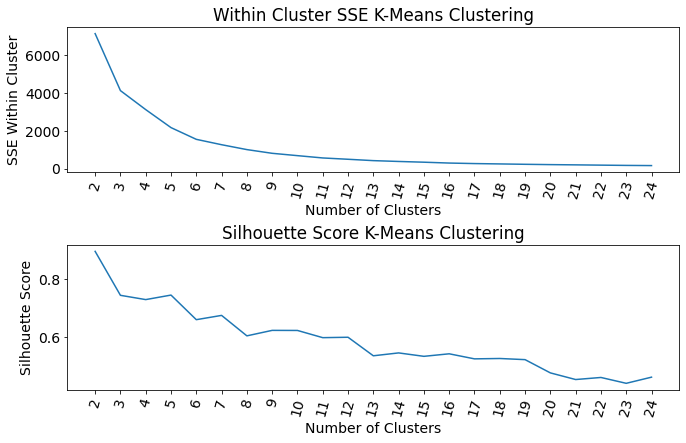

In [37]:
plot_cluster(X, max_loop=25)

In [38]:
def apply_cluster(n, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """

    X = data.iloc[:, [15, 17]].values
    # Standard Scaler
    sc = StandardScaler()
    S_c = sc.fit_transform(X)

    kmeans = KMeans(n_clusters = clusters, init = 'k-means++', random_state = 42) 
    y_kmeans = kmeans.fit_predict(S_c)
    score = metrics.silhouette_score(S_c, kmeans.labels_, random_state=10)
    # df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return n

In [39]:
# Using clusters = 3
first_trial = apply_cluster(X, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.74
sse withing cluster: 4129.0


## First Kmeans Clustering Using Three Clusters

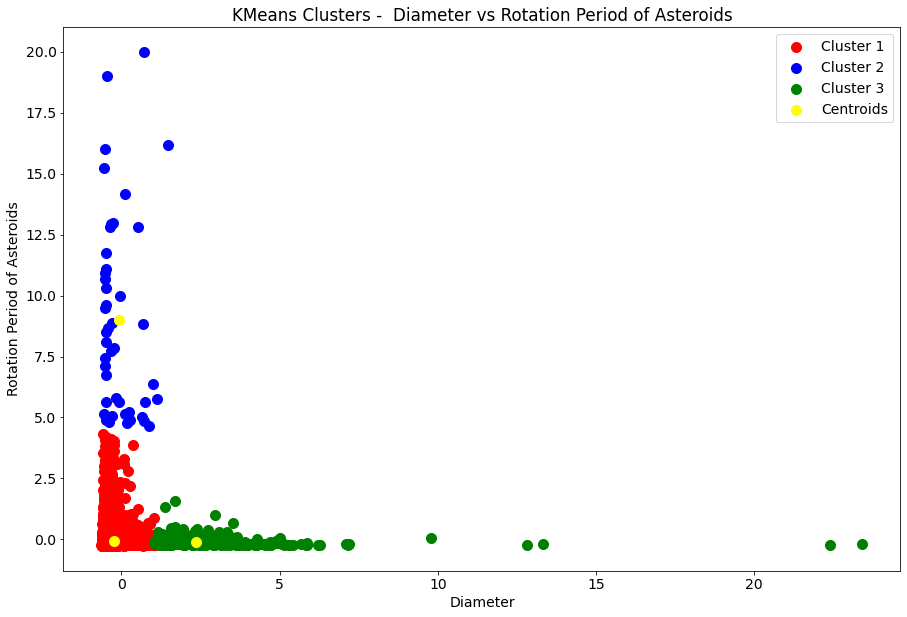

In [40]:
# Performing Kmeans using Clusters = 3
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, [15, 17]].values
# Standard Scaler
sc = StandardScaler()
S_c = sc.fit_transform(X)

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(S_c)

plt.figure(figsize=(15,10))
plt.scatter(S_c[y_kmeans == 0, 0], S_c[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(S_c[y_kmeans == 1, 0], S_c[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(S_c[y_kmeans == 2, 0], S_c[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clusters -  Diameter vs Rotation Period of Asteroids')
plt.xlabel('Diameter')
plt.ylabel('Rotation Period of Asteroids')
# plt.xticks([i for i in range(0, 10)], rotation=360)
# plt.yticks([i for i in range(0, 10)], rotation=360)
plt.legend()
plt.show()

### First Fractal Clustering of Three Clusters
### Cluster 0 have biggest number of cluster 4869 for diameter and rotation period data



In [87]:
Cl1 = data[['name','diameter', 'rot_per']] 

In [88]:
new = data._get_numeric_data().dropna(axis=1)
Cl1['Clustered1'] = pd.Series(y_kmeans, index=data.index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
cluster1_perf = (
     Cl1
    .groupby('Clustered1')
    .agg({"name":'count',"diameter":"count", "rot_per":"count"})
    .sort_values('diameter')
    .reset_index()
)

cluster1_perf

,Clustered1,name,diameter,rot_per
0,1,45,45,45
1,2,496,496,496
2,0,4869,4869,4869


In [90]:
# creating a dataframe that only consists of cluster `0` with highest count cluster
cluster1_sub = Cl1.query("Clustered1 == 0").reset_index(drop=True)
cluster1_sub = cluster1_sub.drop('Clustered1',axis = 1)
cluster1_sub

,name,diameter,rot_per
0,Phocaea,61.054,9.9341
1,Polyhymnia,52.929,18.6080
2,Echo,43.218,25.2080
3,Angelina,58.292,8.7520
4,Asia,56.309,15.8530
...,...,...,...
4864,Cacus,1.900,3.7538
4865,Vnukov,4.765,8.9000
4866,Rainerkracht,1.929,7.4400
4867,Agni,0.462,21.9900


In [68]:
# cluster1_sub_drop_name = cluster1_sub.drop('name',axis = 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f875ee59150>,
      dtype=object)

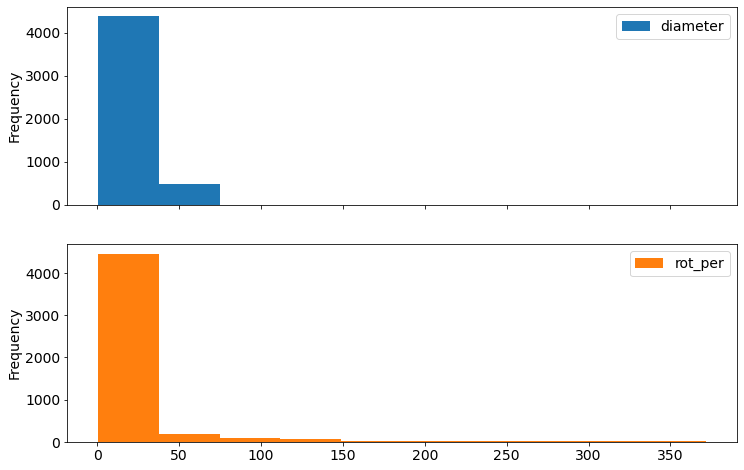

In [91]:
cluster1_sub[["diameter", "rot_per"]].plot(bins=10, kind="hist", subplots=True)

# 2.2 Second Clustering Iteration

### Perform Elbow Method (SSE Within Clusters) and Silhouette Score
### silhouette score: 0.74
### sse withing cluster: 2172.0

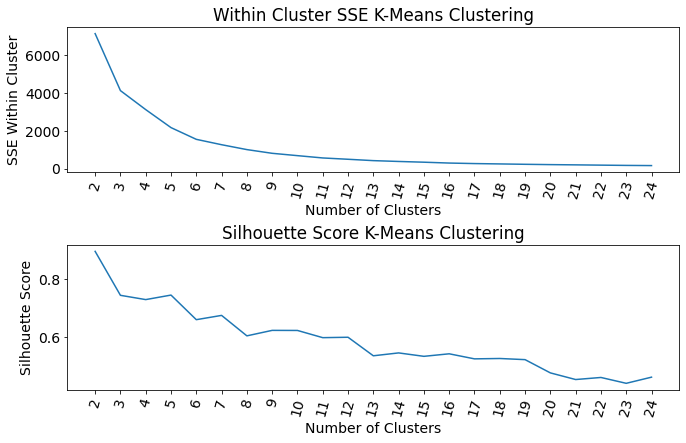

In [92]:
## Performed SSE and Silhouette Score on Three Clusters
plot_cluster(cluster1_sub[["diameter", "rot_per"]], max_loop=25)

In [93]:
second_trial = apply_cluster(cluster1_sub[["diameter", "rot_per"]], clusters=5)

clustering performance
-----------------------------------
silhouette score: 0.74
sse withing cluster: 2172.0


## Second Kmeans Clustering Using Five Clusters

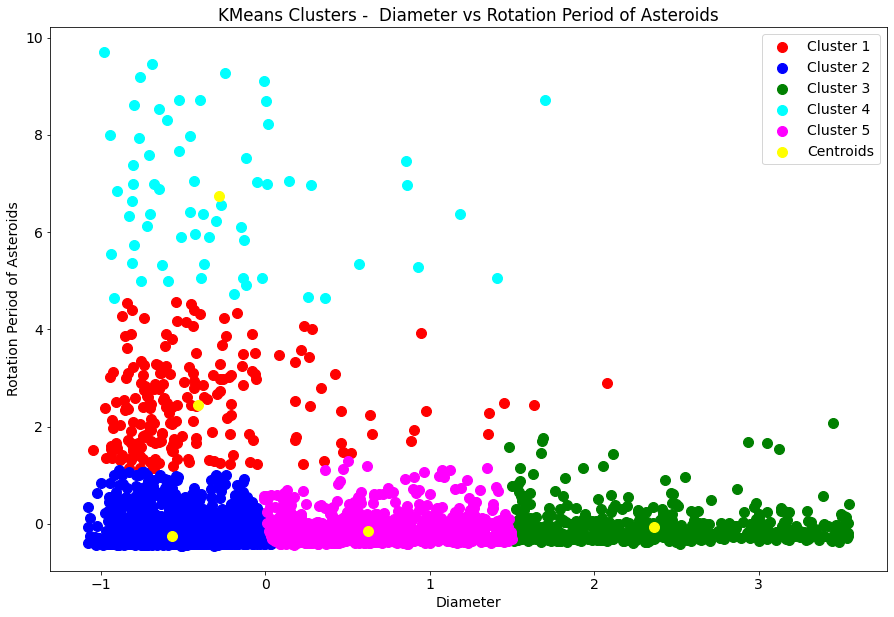

In [95]:
# Performing Kmeans using Clusters = 5
from sklearn.preprocessing import StandardScaler
# X = data.iloc[:, [14, 16]].values
# Standard Scaler
sc = StandardScaler()
S_c = sc.fit_transform(cluster1_sub[["diameter", "rot_per"]])

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans_5 = kmeans.fit_predict(S_c)

plt.figure(figsize=(15,10))
plt.scatter(S_c[y_kmeans_5 == 0, 0], S_c[y_kmeans_5 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(S_c[y_kmeans_5 == 1, 0], S_c[y_kmeans_5 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(S_c[y_kmeans_5 == 2, 0], S_c[y_kmeans_5 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(S_c[y_kmeans_5 == 3, 0], S_c[y_kmeans_5 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(S_c[y_kmeans_5 == 4, 0], S_c[y_kmeans_5 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clusters -  Diameter vs Rotation Period of Asteroids')
plt.xlabel('Diameter')
plt.ylabel('Rotation Period of Asteroids')
# plt.xticks([i for i in range(0, 10)], rotation=360)
# plt.yticks([i for i in range(0, 10)], rotation=360)
plt.legend()
plt.show()

### Second Fractal Clustering of Cluster 0 
### Cluster 1 have biggest number of cluster 3051 for diameter and rotation period data

In [96]:
Cl2 = cluster1_sub[['name','diameter', 'rot_per']] 

In [97]:
new = cluster1_sub._get_numeric_data().dropna(axis=1)
Cl2['Clustered2'] = pd.Series(y_kmeans_5, index=cluster1_sub.index)

In [98]:
cluster2_perf = (
     Cl2
    .groupby('Clustered2')
    .agg({"name":"count","diameter":"count", "rot_per":"count"})
    .sort_values('diameter')
    .reset_index()
)

cluster2_perf

,Clustered2,name,diameter,rot_per
0,3,63,63,63
1,0,199,199,199
2,2,502,502,502
3,4,1054,1054,1054
4,1,3051,3051,3051


In [99]:
# creating a dataframe that only consists of cluster `4` with highest count cluster
cluster2_sub = Cl2.query("Clustered2 == 1").reset_index(drop=True)
cluster2_sub = cluster2_sub.drop('Clustered2',axis = 1)
cluster2_sub

,name,diameter,rot_per
0,Agathe,9.300,6.4840
1,Augusta,12.467,5.8949
2,Valda,14.645,17.3860
3,Lucretia,11.036,4.3480
4,Bruna,9.822,13.8070
...,...,...,...
3046,Cacus,1.900,3.7538
3047,Vnukov,4.765,8.9000
3048,Rainerkracht,1.929,7.4400
3049,Agni,0.462,21.9900


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f875ee28b90>,
      dtype=object)

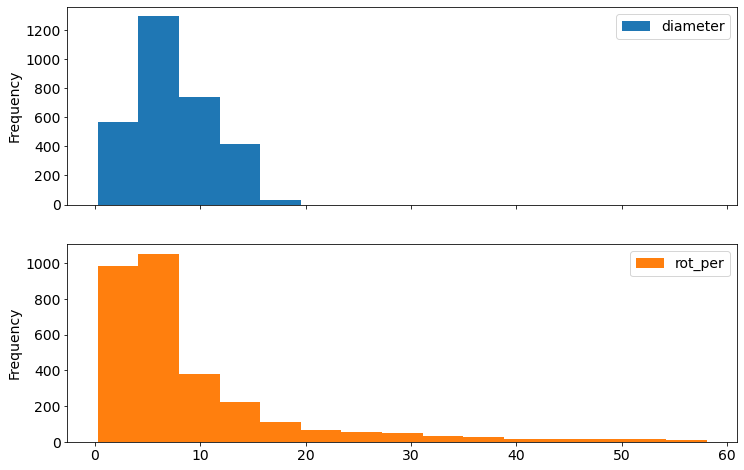

In [100]:
cluster2_sub[["diameter", "rot_per"]].plot(bins=15, kind="hist", subplots=True)

#2.3 Third Clustering Iteration

### Perform Elbow Method (SSE Within Clusters) and Silhouette Score
### silhouette score: 0.74
### sse withing cluster: 2172.0


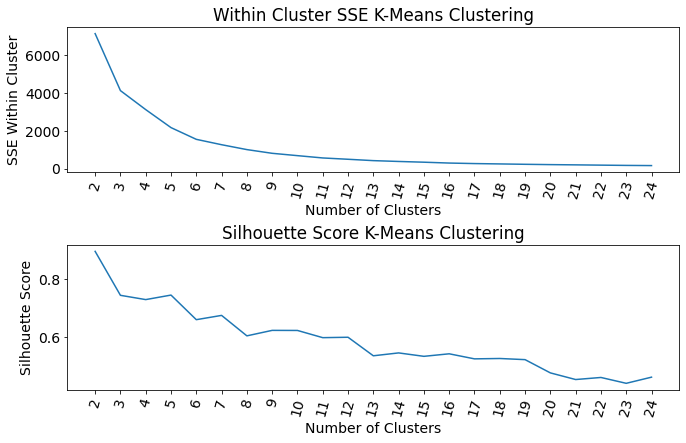

In [101]:
plot_cluster(cluster2_sub[["diameter", "rot_per"]], max_loop=25)

In [102]:
third_trial = apply_cluster(cluster2_sub[["diameter", "rot_per"]], clusters=5)

clustering performance
-----------------------------------
silhouette score: 0.74
sse withing cluster: 2172.0


## Third Kmeans Clustering Using Five Clusters

 

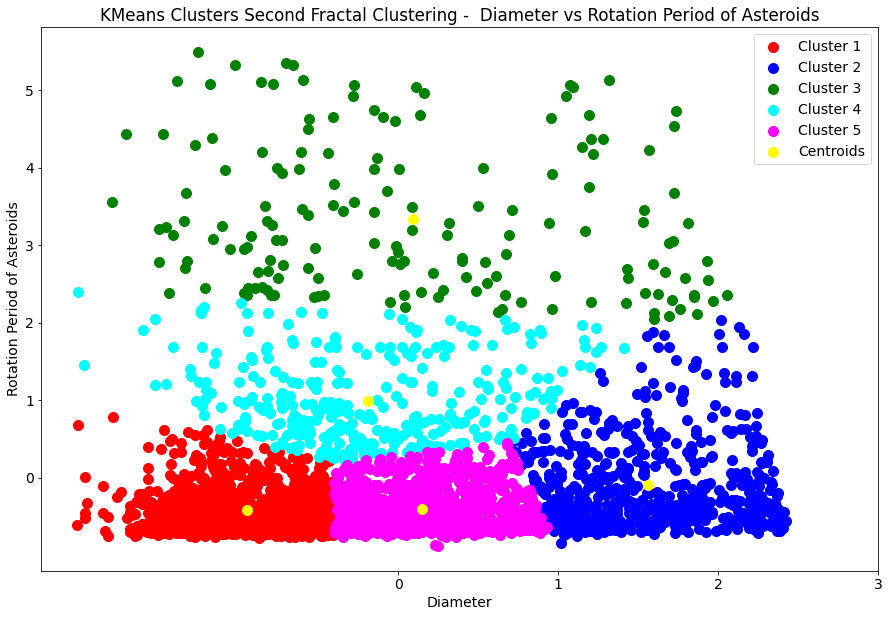

In [104]:
# Performing Kmeans using Clusters = 5
from sklearn.preprocessing import StandardScaler
# X = data.iloc[:, [14, 16]].values
# Standard Scaler
sc = StandardScaler()
S_c = sc.fit_transform(cluster2_sub[["diameter", "rot_per"]])

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans_5 = kmeans.fit_predict(S_c)
plt.figure(figsize=(15,10))
plt.scatter(S_c[y_kmeans_5 == 0, 0], S_c[y_kmeans_5 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(S_c[y_kmeans_5 == 1, 0], S_c[y_kmeans_5 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(S_c[y_kmeans_5 == 2, 0], S_c[y_kmeans_5 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(S_c[y_kmeans_5 == 3, 0], S_c[y_kmeans_5 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(S_c[y_kmeans_5 == 4, 0], S_c[y_kmeans_5 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clusters Second Fractal Clustering -  Diameter vs Rotation Period of Asteroids')
plt.xlabel('Diameter')
plt.ylabel('Rotation Period of Asteroids')
plt.xticks([i for i in range(0, 4)], rotation=360)
plt.yticks([i for i in range(0, 6)], rotation=360)
plt.legend()
plt.show()

### Third Fractal Clustering of Cluster 1-(3051) from Cluster 0-(4839)
### Found Three Golden Clusters after third Kmeans cluster iteration
### Cluster 0-(1045), Cluster 4-(935), Cluster 1-(581) diameter and rotation data

In [107]:
Cl3 = cluster2_sub[['name','diameter', 'rot_per']] 

In [108]:
new = cluster2_sub._get_numeric_data().dropna(axis=1)
Cl3['Clustered3'] = pd.Series(y_kmeans_5, index=cluster2_sub.index)

In [109]:
cluster3_perf = (
     Cl3
    .groupby('Clustered3')
    .agg({"name":"count","diameter":"count", "rot_per":"count"})
    .sort_values('diameter')
    .reset_index()
)

cluster3_perf

,Clustered3,name,diameter,rot_per
0,2,163,163,163
1,3,327,327,327
2,1,581,581,581
3,4,935,935,935
4,0,1045,1045,1045


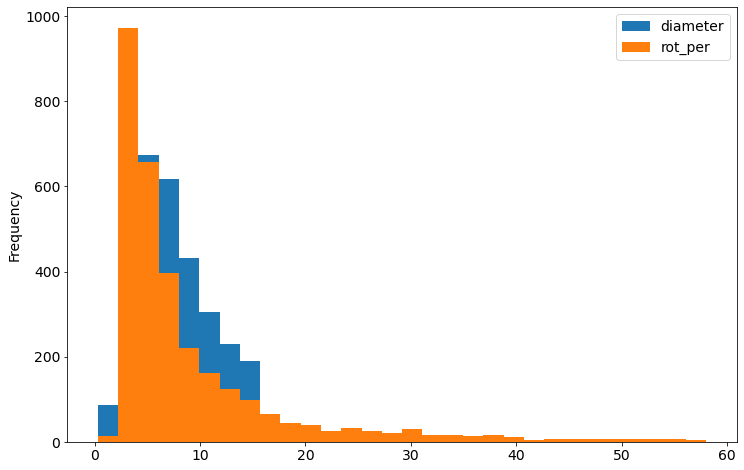

In [117]:
Cl3[["diameter", "rot_per"]].plot(bins=30, kind="hist")

In [121]:
# creating a dataframe that only consists of cluster 0-(1045) with highest count cluster
cluster3_0_sub = Cl3.query("Clustered3 == 0").reset_index(drop=True)
cluster3_0_sub = cluster3_0_sub.drop('Clustered3',axis = 1)
cluster3_0_sub

,name,diameter,rot_per
0,Leonisis,5.887,5.5783
1,Jole,5.757,9.6150
2,Mildred,2.529,2.6600
3,Riema,4.605,3.5880
4,Aster,5.554,3.1581
...,...,...,...
1040,Kralice,5.346,8.4200
1041,Cacus,1.900,3.7538
1042,Vnukov,4.765,8.9000
1043,Rainerkracht,1.929,7.4400


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f875c74f850>,
      dtype=object)

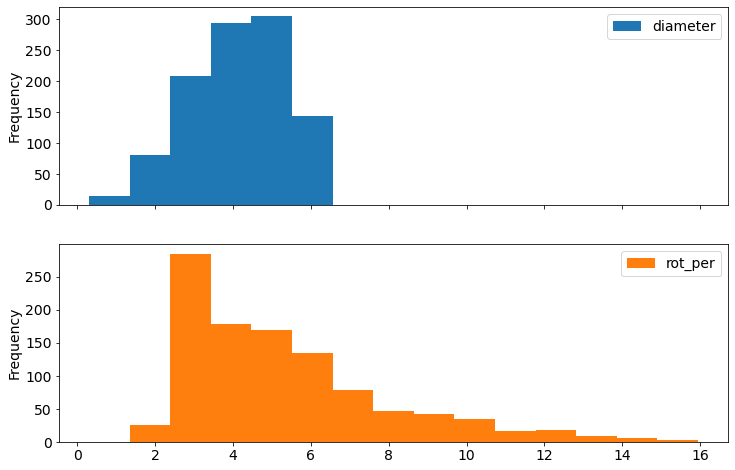

In [122]:
cluster3_0_sub[["diameter", "rot_per"]].plot(bins=15, kind="hist", subplots=True)

In [124]:
# creating a dataframe that only consists of cluster 4-(935) with second highest count cluster
cluster3_4_sub = Cl3.query("Clustered3 == 4").reset_index(drop=True)
cluster3_4_sub = cluster3_4_sub.drop('Clustered3',axis = 1)
cluster3_4_sub

,name,diameter,rot_per
0,Agathe,9.300,6.4840
1,Alice,10.456,4.3130
2,Phaetusa,8.196,4.5385
3,Constantia,6.534,5.3450
4,Adalberta,9.111,3.5553
...,...,...,...
930,Antjiekrog,6.785,4.2130
931,Michelory,7.621,5.3350
932,Persiceto,7.913,6.2710
933,Lesicki,6.983,8.1910


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f875c653490>,
      dtype=object)

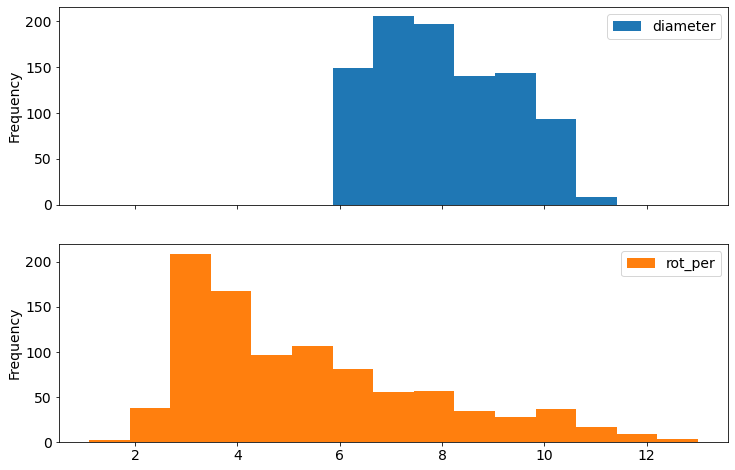

In [125]:
cluster3_4_sub[["diameter", "rot_per"]].plot(bins=15, kind="hist", subplots=True)

In [127]:
# creating a dataframe that only consists of cluster 1-(581) with highest count cluster
cluster3_1_sub = Cl3.query("Clustered3 == 1").reset_index(drop=True)
cluster3_1_sub = cluster3_1_sub.drop('Clustered3',axis = 1)
cluster3_1_sub

,name,diameter,rot_per
0,Augusta,12.467,5.89490
1,Valda,14.645,17.38600
2,Lucretia,11.036,4.34800
3,Ruperto-Carola,14.025,2.73898
4,Zahringia,14.119,6.42000
...,...,...,...
576,Travisbarman,12.718,8.65000
577,Mosigkau,14.571,4.99000
578,Randytatum,12.235,5.16500
579,Philnicolai,13.359,4.64100


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f875c529910>,
      dtype=object)

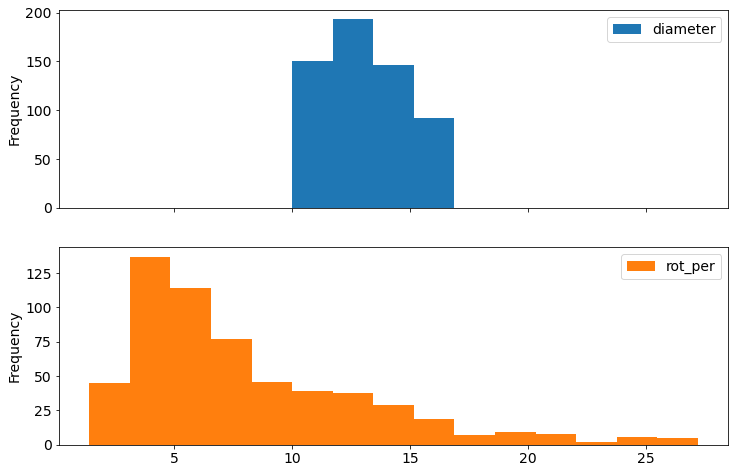

In [128]:
cluster3_1_sub[["diameter", "rot_per"]].plot(bins=15, kind="hist", subplots=True)

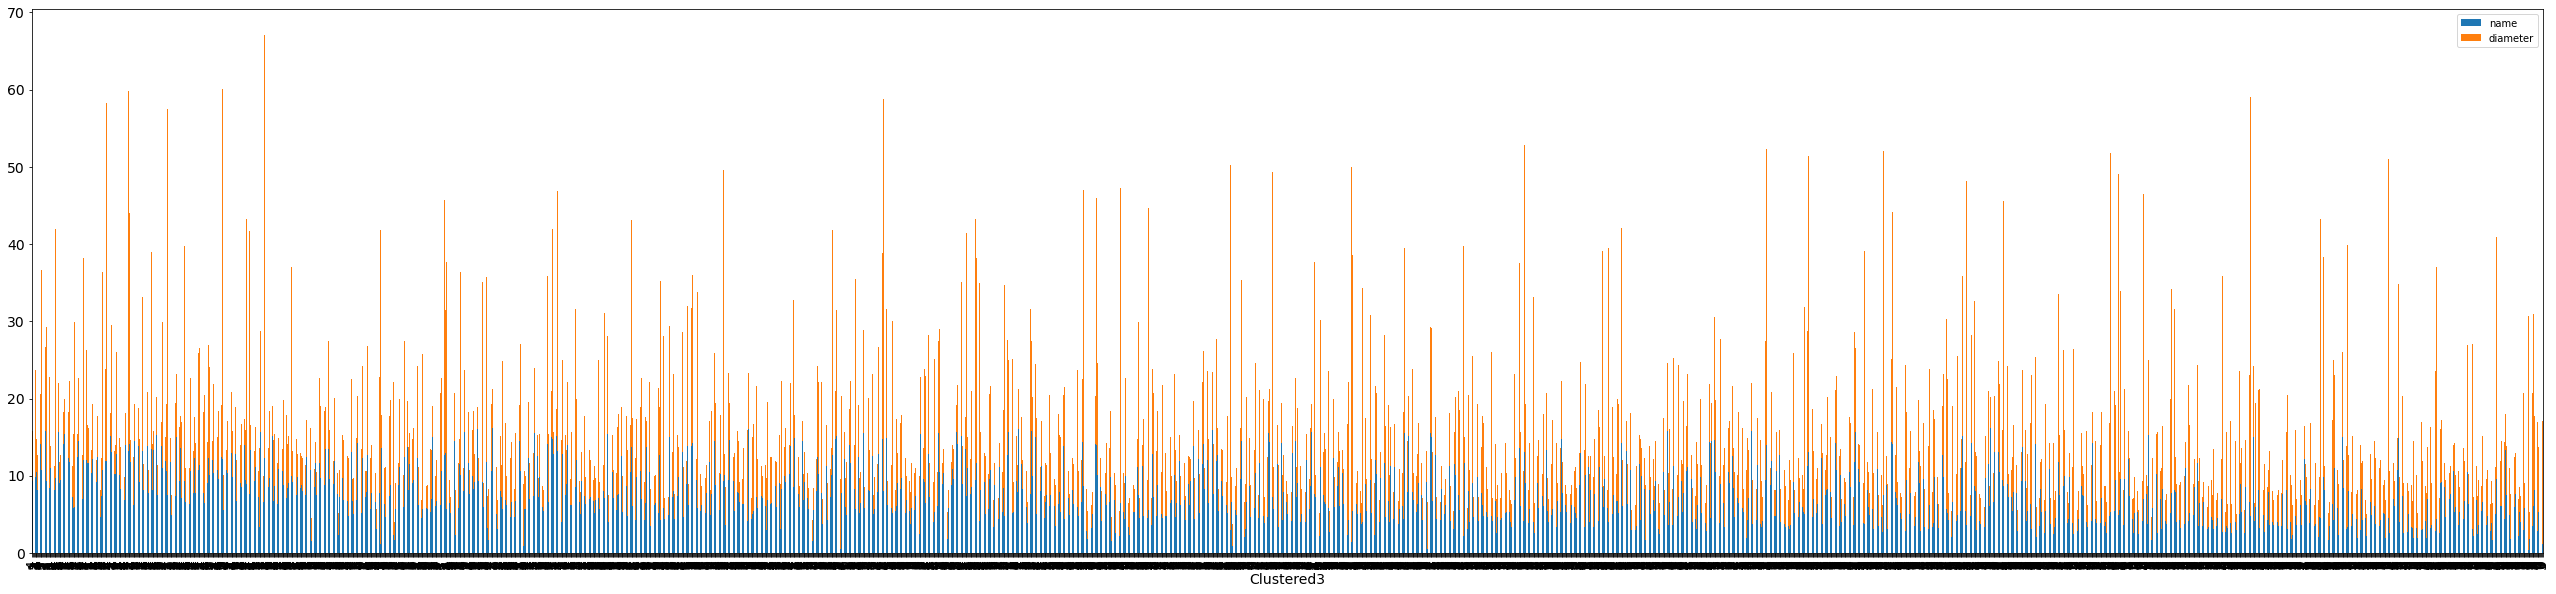

In [131]:
Cl3.set_index('Clustered3').plot(kind='bar', stacked=True, figsize=(45,10))
plt.legend(['name','diameter', 'rot_per'], prop={"size":10})

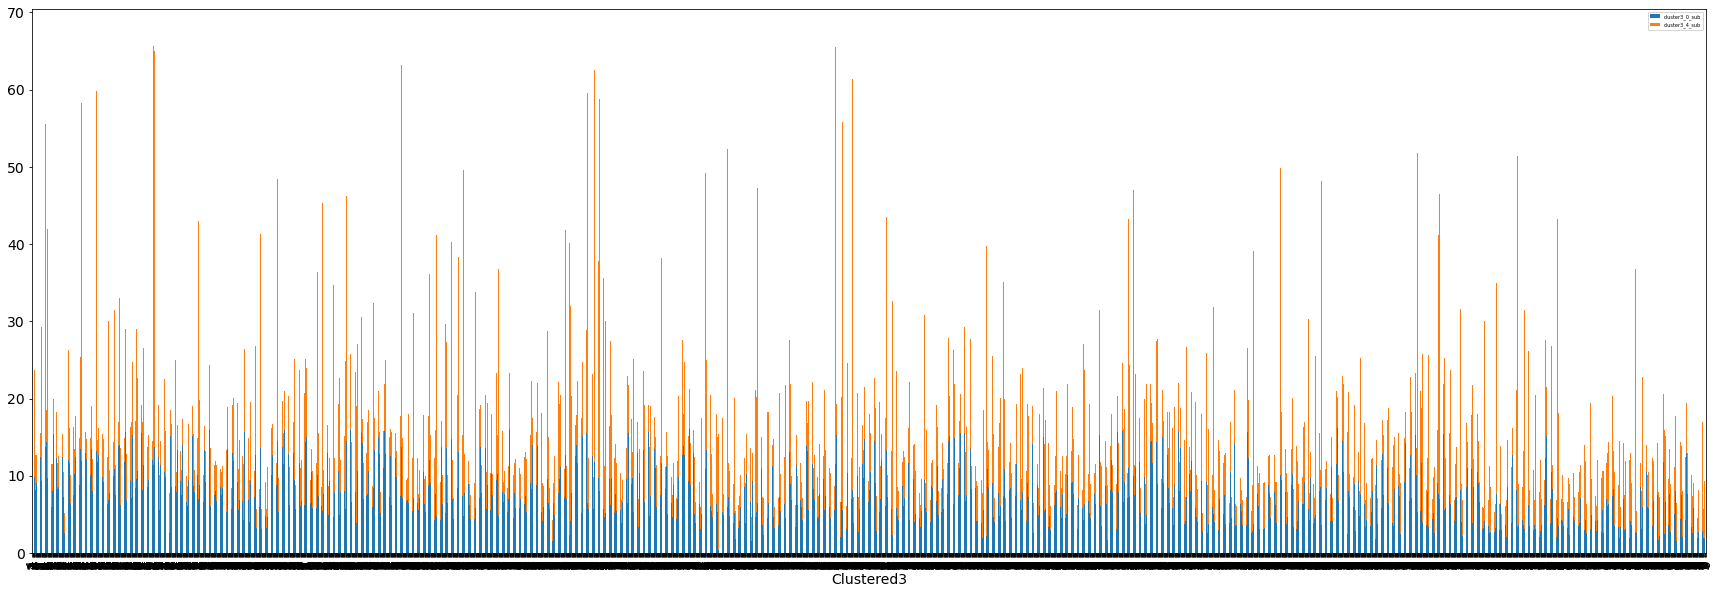

In [132]:
Cl3.set_index('Clustered3').plot(kind='bar', stacked=True, figsize=(30,10))
plt.legend(["cluster3_0_sub", "cluster3_4_sub", "cluster3_1_sub"], prop={"size":5})

In [133]:
Cl3

,name,diameter,rot_per,Clustered3
0,Agathe,9.300,6.4840,4
1,Augusta,12.467,5.8949,1
2,Valda,14.645,17.3860,1
3,Lucretia,11.036,4.3480,1
4,Bruna,9.822,13.8070,3
...,...,...,...,...
3046,Cacus,1.900,3.7538,0
3047,Vnukov,4.765,8.9000,0
3048,Rainerkracht,1.929,7.4400,0
3049,Agni,0.462,21.9900,3


In [134]:
path = '/content/drive/My Drive/Underdog/data/Diameter_Asteroid_data.csv'

Cl3.to_csv(path)

data = pd.read_csv(path)

In [135]:
data

,Unnamed: 0,name,diameter,rot_per,Clustered3
0,0,Agathe,9.300,6.4840,4
1,1,Augusta,12.467,5.8949,1
2,2,Valda,14.645,17.3860,1
3,3,Lucretia,11.036,4.3480,1
4,4,Bruna,9.822,13.8070,3
...,...,...,...,...,...
3046,3046,Cacus,1.900,3.7538,0
3047,3047,Vnukov,4.765,8.9000,0
3048,3048,Rainerkracht,1.929,7.4400,0
3049,3049,Agni,0.462,21.9900,3
